#  Plotting Earthquake Locations
This activity looks for patterns in data from the U.S. Geological Survey (USGS) on earthquakes and other seismic events around the world.  


**Part One**.

In [31]:
#importing what we'll need
print("wait for it ...")
print(" ... ")
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
pd.options.display.max_columns = 25
#Colab requires specific installation of cartopy
!apt-get -qq install python-cartopy python3-cartopy;
!pip uninstall -y shapely;    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely;
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


wait for it ...
 ... 
Uninstalling Shapely-1.7.1:
  Successfully uninstalled Shapely-1.7.1
  Using cached https://files.pythonhosted.org/packages/42/f3/0e1bc2c4f15e05e30c6b99322b9ddaa2babb3f43bc7df2698efdc1553439/Shapely-1.7.1.tar.gz
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
    Running setup.py install for shapely ... done


In [36]:
# one month of seismic data from early 2019
#data = pd.read_csv("https://github.com/adamlamee/CODINGinK12/raw/master/data/quakes.csv")

# uncomment the line below instead to use live data updated every 15 minutes
data = pd.read_csv("http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv")

data.head(5) # choose to show the first (how many) lines of the file

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-12-06T21:51:27.720Z,39.032333,-123.048500,13.40,1.46,md,5.0,187.00,0.14500,0.02,nc,nc73494585,2020-12-06T21:53:02.325Z,"12km W of Lakeport, CA",earthquake,1.82,7.08,0.160,2.0,automatic,nc,nc
1,2020-12-06T21:42:04.190Z,34.520833,-118.084500,8.03,1.16,ml,23.0,42.00,0.04544,0.16,ci,ci39486919,2020-12-06T21:45:52.949Z,"4km NE of Vincent, CA",earthquake,0.28,0.46,0.216,27.0,automatic,ci,ci
2,2020-12-06T21:40:52.130Z,35.959000,-117.941333,5.16,0.98,ml,17.0,103.00,0.06381,0.08,ci,ci39486911,2020-12-06T21:44:44.051Z,"4km NW of Little Lake, CA",earthquake,0.25,0.98,0.121,14.0,automatic,ci,ci
3,2020-12-06T21:32:15.390Z,38.157800,-118.002000,5.70,1.00,ml,14.0,105.11,0.03500,0.09,nn,nn00790316,2020-12-06T21:35:45.409Z,"27 km SSE of Mina, Nevada",earthquake,NaN,0.70,NaN,NaN,automatic,nn,nn
4,2020-12-06T21:23:58.360Z,38.158800,-118.072700,2.60,1.40,ml,22.0,124.15,0.01000,0.19,nn,nn00790312,2020-12-06T21:33:28.786Z,"25 km S of Mina, Nevada",earthquake,NaN,1.80,NaN,NaN,automatic,nn,nn


In [37]:
# The .shape command displays the (number of rows , number of columns) in a file.
data.shape

(12643, 22)

## Part One
The table above shows seismic reading (vibrations in the Earth) detected any time in the past month.
- What do you think each of the column headings represent?
- How many seismic events are included in this data set?

When you're ready, run each code cell until you get down to **Part Two**.

/usr/lib/python3/dist-packages/cartopy/mpl/geoaxes.py:717: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/usr/lib/python3/dist-packages/cartopy/mpl/geoaxes.py:764: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


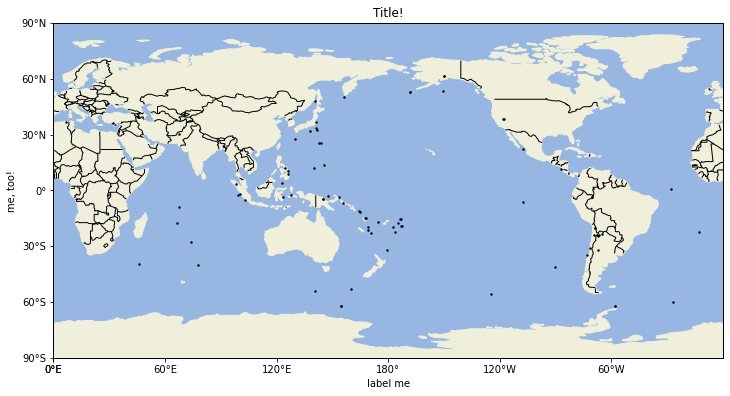

In [53]:
# makes the map
fig, ax = plt.subplots(figsize=(12,15))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) # try centering the map somewhere else
ax.set_global()
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS)
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# makes the scatterplot
plotdata = data.query('mag >5') #depth is in km or magnitude> 5
x = plotdata['longitude']
y = plotdata['latitude']
ax.scatter(x,y,s=2, zorder=10, color='black',transform=ccrs.PlateCarree())
ax.set_title('Title!')
ax.set_xlabel('label me')
ax.set_ylabel('me, too!')
plt.show()

## Part Two  
The code above make a scatterplot with a point for each seismic event in the data table.  
- Do you notice a pattern in the graph? Are any shapes familiar? 
    - Hint: uncomment the line that colors in the oceans  
- Where do seismic readings tend to occur?  
- The title and axis labels on the graph could use some work. Try editing the code above the graph, then run the code again to see the changes.  
  
## Part Three  
Now it's time to conduct your own investigation. Seismic events can be shallow (a few km) or more than 600 km deep. The code above lets you filter the data set by depth (it's called a "query").  
- Find the line that does a query on "depth".  
- Try filtering the data for only seismic events deeper than 100 km, then make a plot.  
- Do you see any pattern in where the deepest earthquakes are?  
- Where do the shallowest earthquakes occur?  
- Grab the latest data instead by editing the 2nd code cell. Are most of the seismic events in the same places?  
  
---  
## Saving Your Work  
This is running on a Google server on a distant planet and deletes what you've done when you close this tab. To save your work for later use or analysis you have a few options:  
- File > "Save a copy in Drive" will save it to you Google Drive in a folder called "Collaboratory". You can run it later from there.  
- File > "Download .ipynb" to save to your computer (and run with Jupyter software later)  
- File > Print to ... um ... print.  
- To save an image of a graph or chart, right-click on it and select Save Image as ...  

## Credits
The data come from the [USGS earthquakes page](http://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php). This notebook was created by Physics teacher and Quarknet member Peter Apps, York Middle/High School, Retsof, NY, and further developed by [Adam LaMee](https://adamlamee.github.io/). Thanks to the great folks at [Binder](https://mybinder.org/) and [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) for making this notebook interactive without you needing to download it or install [Jupyter](https://jupyter.org/) on your own device. Find more activities and license info at [CODINGinK12.org](http://www.codingink12.org).

** HOME WORK **

Goto [CODINGinK12.org](http://www.codingink12.org) and look at the at least one of the projects on that site and play and code.